In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YHuUTYfOP05Bxtp7W8Ce")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov11:: 100%|██████████| 20262/20262 [00:03<00:00, 5320.86it/s]


In [1]:
!nvidia-smi

Tue Aug  5 13:38:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.0/112.6 GB disk)


In [7]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/hemat2-delection-1/train/images/hard_hat_workers1001_png.rf.9cab43bedeb1d7044d635e9b154ed31d.jpg' save=True

100% 5.35M/5.35M [00:00<00:00, 133MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 972, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 557, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 188, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/us

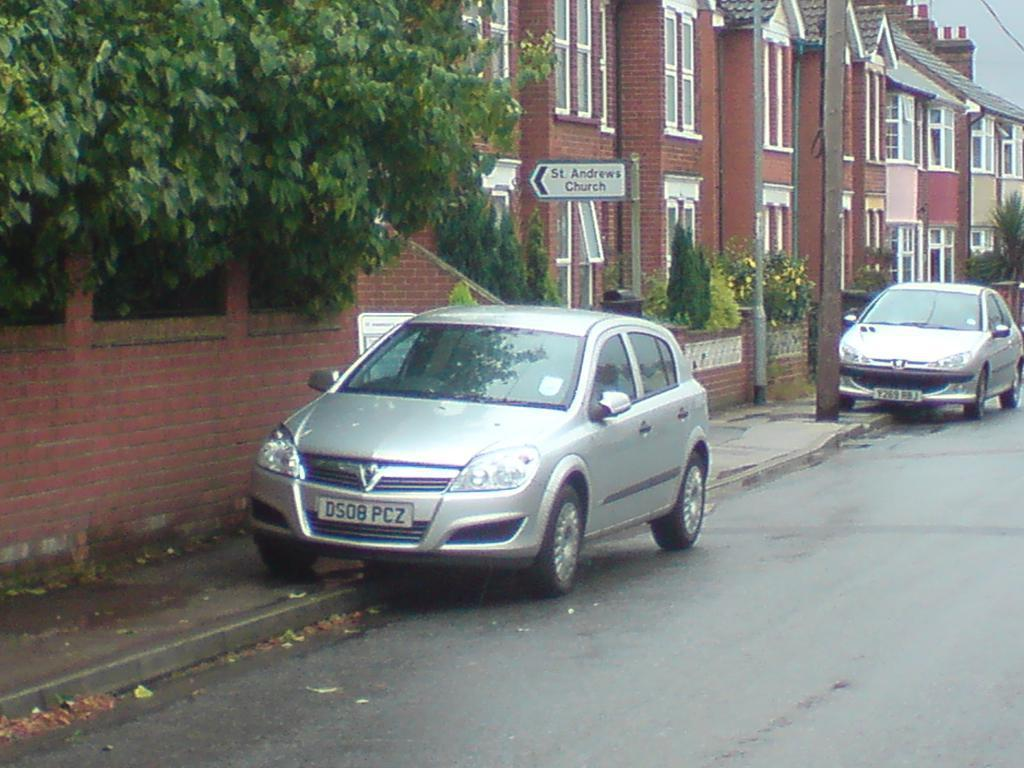

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg', width=600)

In [13]:
from ultralytics import YOLO
from PIL import Image

model = YOLO('yolo11n.pt')
image_path = '/content/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg'
image = Image.open(image_path)
result = model.predict(image, conf=0.25)[0]


0: 480x640 2 cars, 44.5ms
Speed: 34.6ms preprocess, 44.5ms inference, 384.3ms postprocess per image at shape (1, 3, 480, 640)


In [14]:
result.boxes.xyxy

tensor([[ 244.9863,  303.6556,  715.6551,  599.7925],
        [ 837.3461,  282.3588, 1023.5402,  423.2303]], device='cuda:0')

In [15]:
result.boxes.conf


tensor([0.9310, 0.9301], device='cuda:0')

In [16]:
result.boxes.cls

tensor([2., 2.], device='cuda:0')

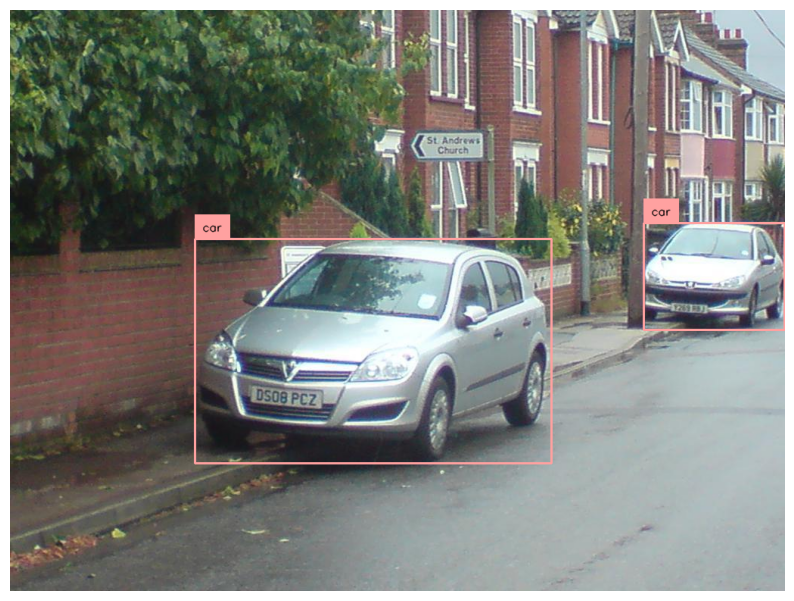

In [19]:
import supervision as sv
from ultralytics.results import Results

# Assuming 'result' is the output from model.predict()
# If 'result' is a Results object, you can create a Detections object like this:
detections = sv.Detections.from_ultralytics(result)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [20]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Y0eJv9bnw0IYyPQ5ibR9")
project = rf.workspace("hemat2").project("hemat2-delection")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to hemat2-delection-1 in yolov11:: 100%|██████████| 2010/2010 [00:00<00:00, 5925.37it/s]


In [21]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YHuUTYfOP05Bxtp7W8Ce")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov11:: 100%|██████████| 20262/20262 [00:05<00:00, 3865.94it/s]


In [22]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 256MB/s]
New https://pypi.org/project/ultralytics/8.3.174 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/License-Plate-Recognition-11/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

In [23]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1754401994.15754d72ccfb.4833.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


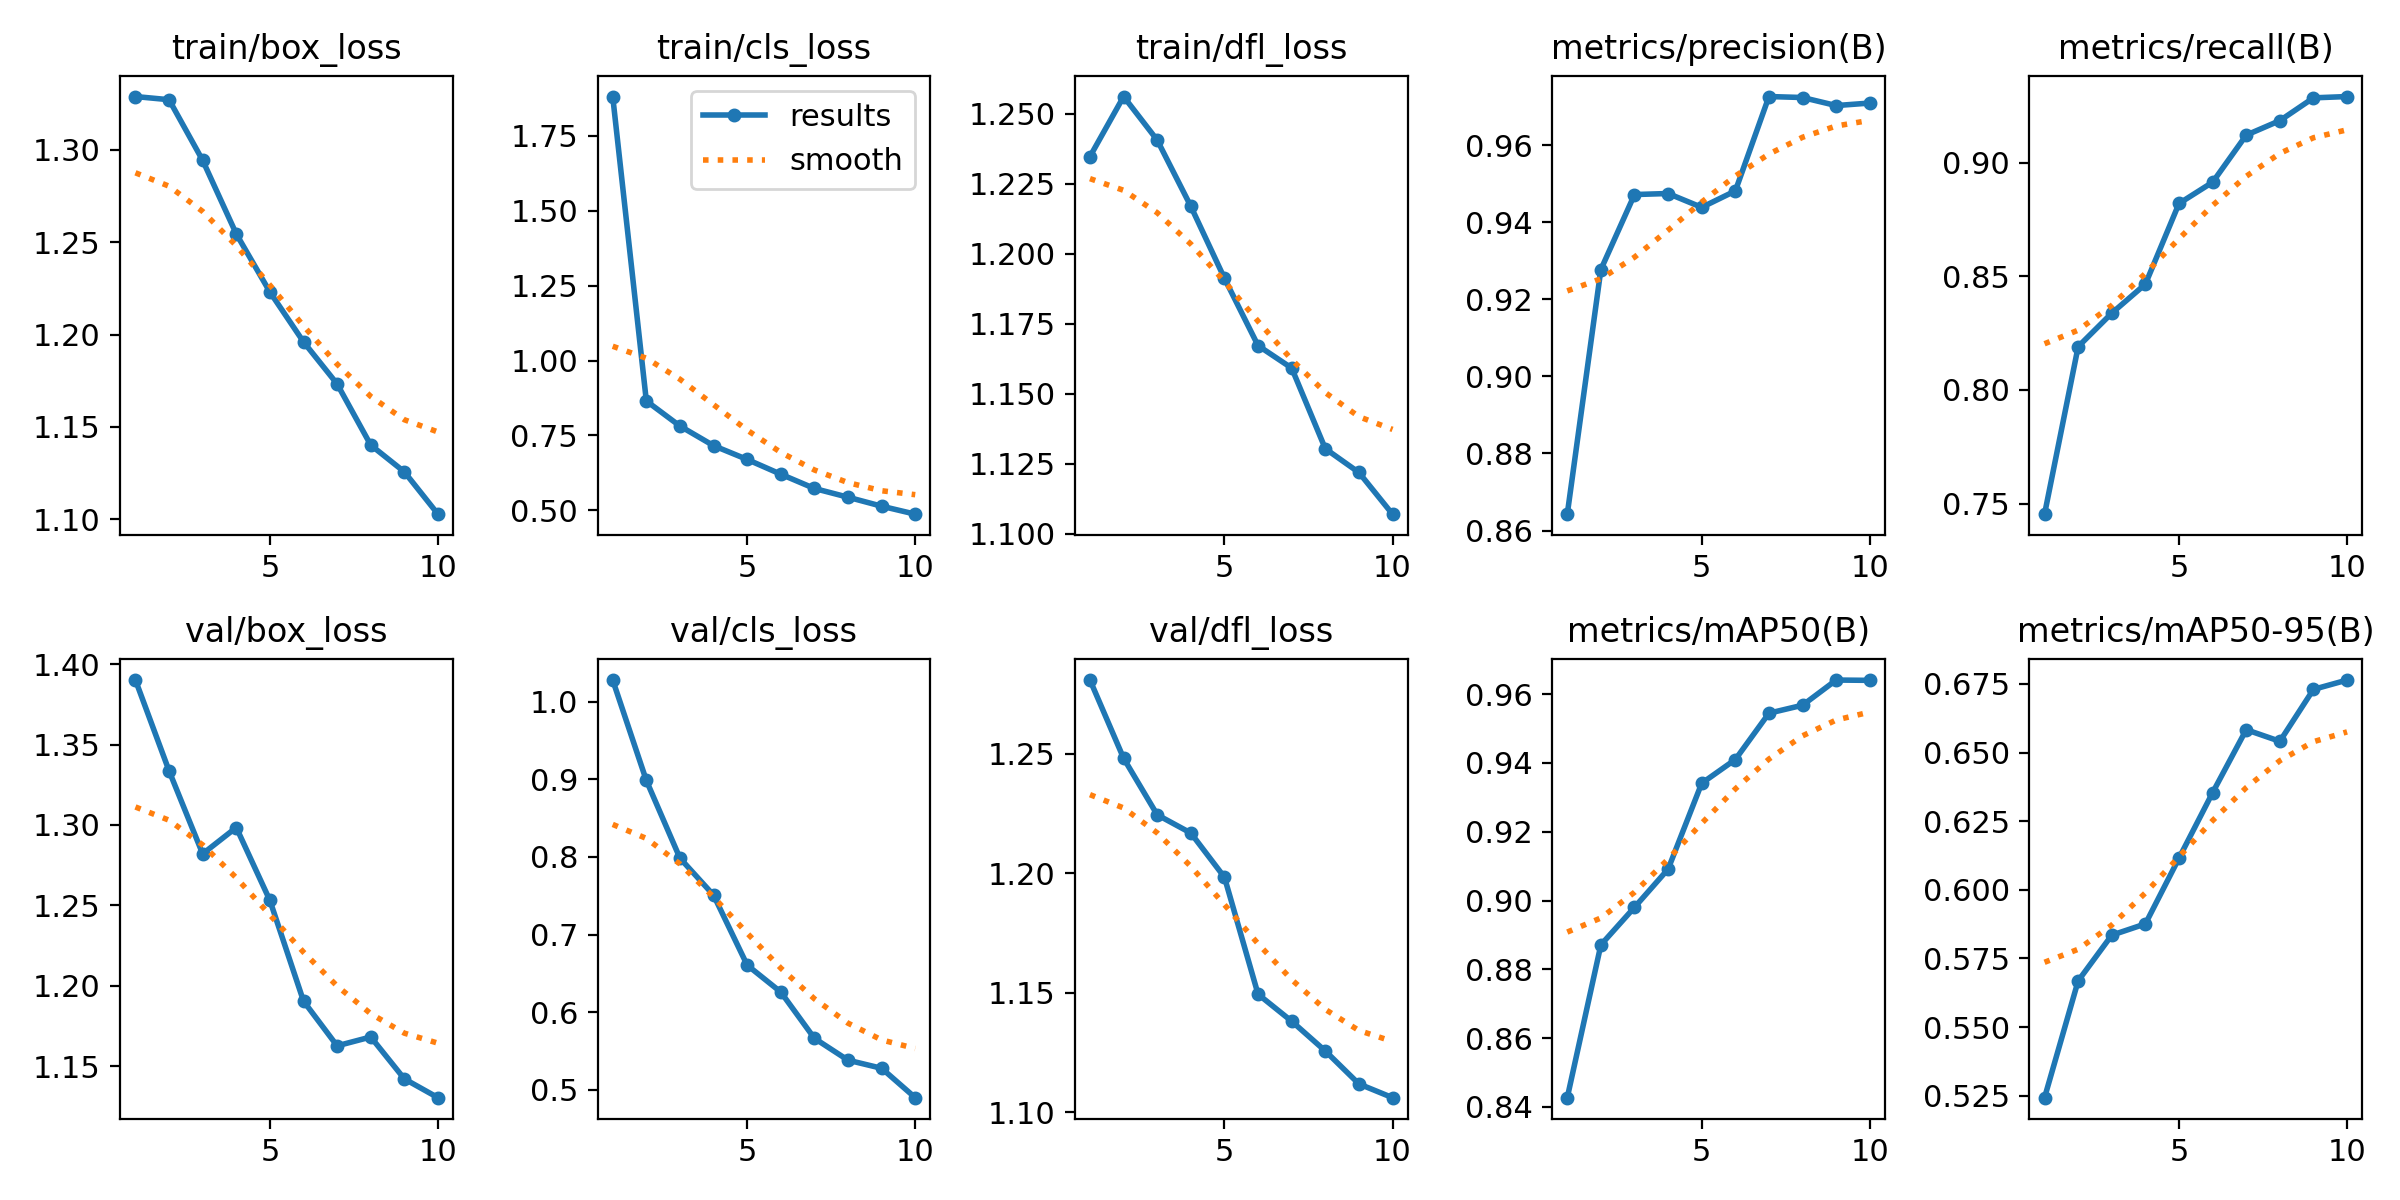

In [24]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [25]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/License-Plate-Recognition-11/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% 2048/2048 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [00:22<00:00,  5.63it/s]
                   all       2048       2195      0.972      0.928      0.964      0.676
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [27]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")

ValueError: max() arg is an empty sequence

In [28]:
# Run prediction using the best trained model
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='{HOME}/datasets/License-Plate-Recognition-11/test/images/' save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/1020 /content/datasets/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg: 480x640 2 License_Plates, 50.2ms
image 2/1020 /content/datasets/License-Plate-Recognition-11/test/images/000812dcf304a8e7_jpg.rf.ba32e6c184b3d974abcced6f7c29af6d.jpg: 576x640 1 License_Plate, 47.2ms
image 3/1020 /content/datasets/License-Plate-Recognition-11/test/images/0010f4c10f7ab07e_jpg.rf.1844f6dde3b97ed1c762db933bbacaf3.jpg: 480x640 1 License_Plate, 13.0ms
image 4/1020 /content/datasets/License-Plate-Recognition-11/test/images/001cdd25e148cd36_jpg.rf.3921d4ff1d51af107666bc7ef7bd45b1.jpg: 480x640 1 License_Plate, 12.4ms
image 5/1020 /content/datasets/License-Plate-Recognition-11/test/images/002519f868563098_jpg.rf.29775b804909c1d042ce008c09f033e4.jpg: 448x640 1 License_Plate, 44.3ms
im

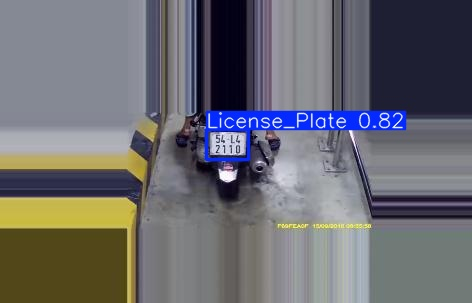

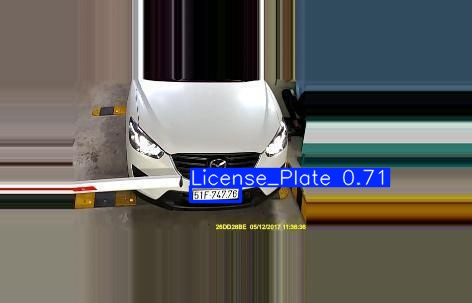

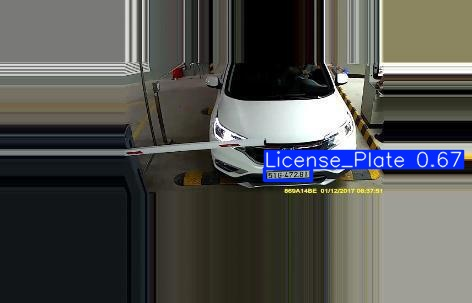

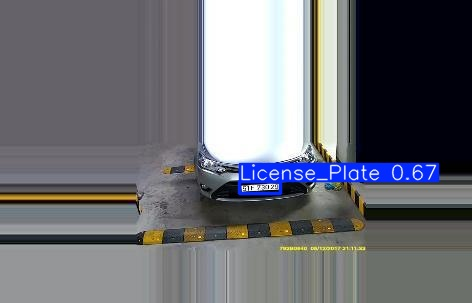

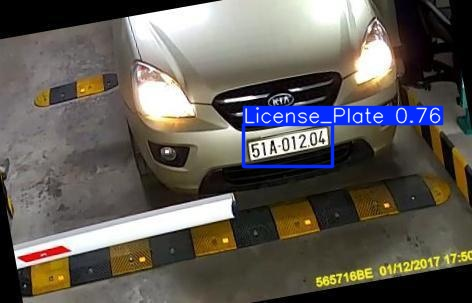

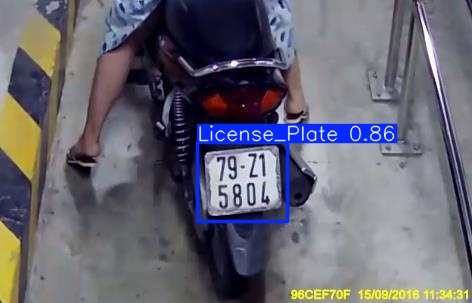

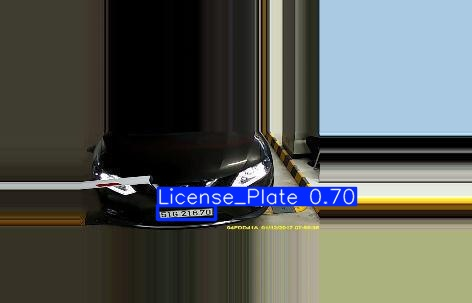

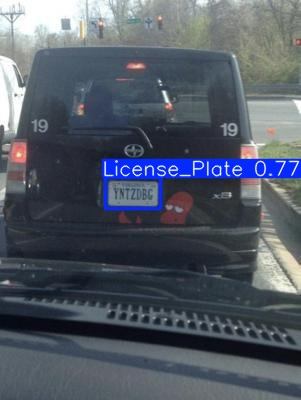

In [29]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [30]:
# Run prediction using the best trained model
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='{HOME}/datasets/License-Plate-Recognition-11/test/images/' save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/1020 /content/datasets/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg: 480x640 2 License_Plates, 43.9ms
image 2/1020 /content/datasets/License-Plate-Recognition-11/test/images/000812dcf304a8e7_jpg.rf.ba32e6c184b3d974abcced6f7c29af6d.jpg: 576x640 1 License_Plate, 44.8ms
image 3/1020 /content/datasets/License-Plate-Recognition-11/test/images/0010f4c10f7ab07e_jpg.rf.1844f6dde3b97ed1c762db933bbacaf3.jpg: 480x640 1 License_Plate, 13.1ms
image 4/1020 /content/datasets/License-Plate-Recognition-11/test/images/001cdd25e148cd36_jpg.rf.3921d4ff1d51af107666bc7ef7bd45b1.jpg: 480x640 1 License_Plate, 12.4ms
image 5/1020 /content/datasets/License-Plate-Recognition-11/test/images/002519f868563098_jpg.rf.29775b804909c1d042ce008c09f033e4.jpg: 448x640 1 License_Plate, 46.4ms
im

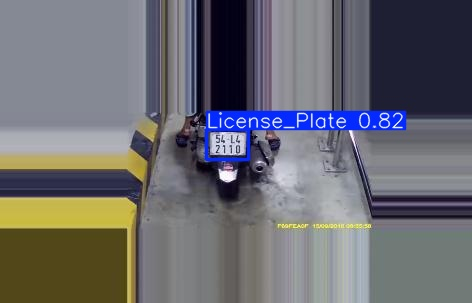

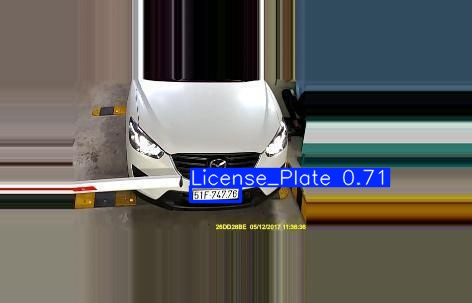

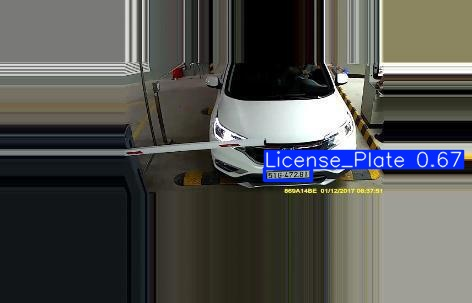

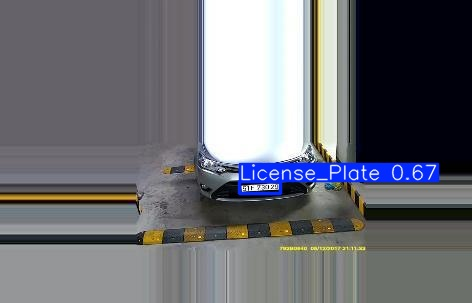

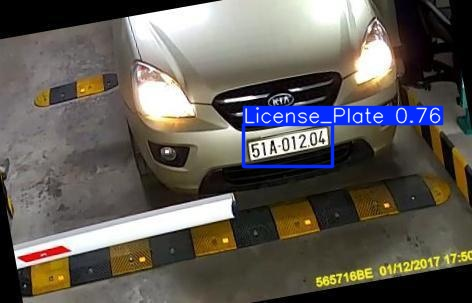

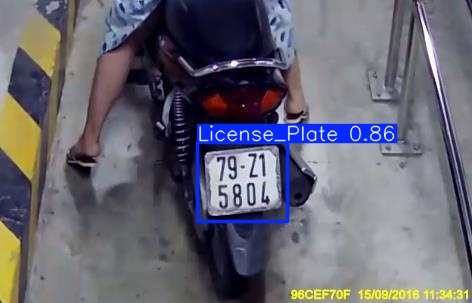

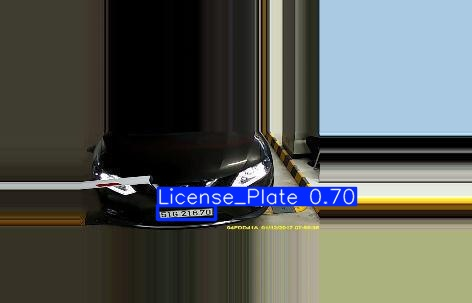

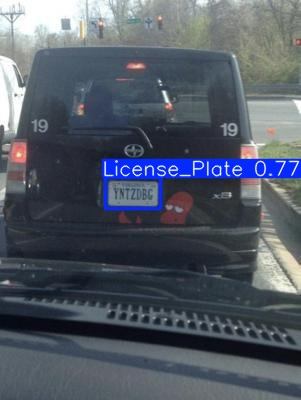

In [31]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")